In [1]:
import pandas as pd
import numpy as np
import math

%matplotlib inline

In [17]:
# サイクルあたりのステップ数(1周期)
steps_per_cycle = 50

# 生成するサイクル数(周期数)
number_of_cycles = 100

In [18]:
df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
df.head(5)

,t
0,0
1,1
2,2
3,3
4,4


<Axes: >

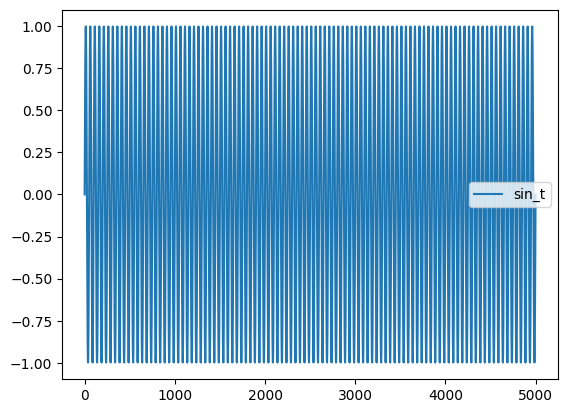

In [22]:
df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycles)))
# sin(t) = sin(2pi/T)x
df[["sin_t"]].plot()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       5001 non-null   int64  
 1   sin_t   5001 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 78.3 KB


<Axes: >

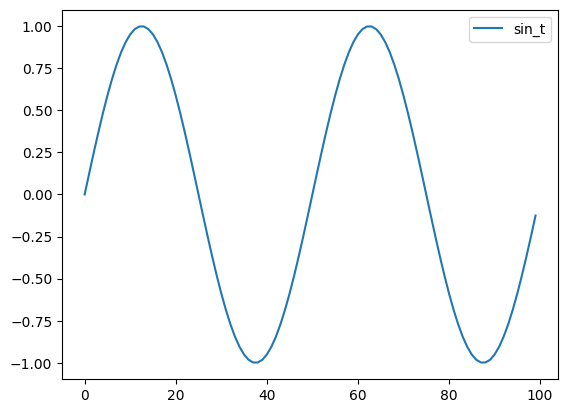

In [25]:
df[["sin_t"]].head(steps_per_cycle * 2).plot()

In [26]:
df["sin_t+1"] = df["sin_t"].shift(-1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   t        5001 non-null   int64  
 1   sin_t    5001 non-null   float64
 2   sin_t+1  5000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [ ]:
df.head()

,t,sin_t,sin_t+1
0,0,0.000000,0.125333
1,1,0.125333,0.248690
2,2,0.248690,0.368125
3,3,0.368125,0.481754
4,4,0.481754,0.587785


In [30]:
df.tail

<bound method NDFrame.tail of          t         sin_t       sin_t+1
0        0  0.000000e+00  1.253332e-01
1        1  1.253332e-01  2.486899e-01
2        2  2.486899e-01  3.681246e-01
3        3  3.681246e-01  4.817537e-01
4        4  4.817537e-01  5.877853e-01
...    ...           ...           ...
4996  4996 -4.817537e-01 -3.681246e-01
4997  4997 -3.681246e-01 -2.486899e-01
4998  4998 -2.486899e-01 -1.253332e-01
4999  4999 -1.253332e-01  3.928773e-15
5000  5000  3.928773e-15           NaN

[5001 rows x 3 columns]>

In [31]:
df.dropna(inplace=True)
df.tail()

,t,sin_t,sin_t+1
4995,4995,-0.587785,-4.817537e-01
4996,4996,-0.481754,-3.681246e-01
4997,4997,-0.368125,-2.486899e-01
4998,4998,-0.248690,-1.253332e-01
4999,4999,-0.125333,3.928773e-15


<Axes: >

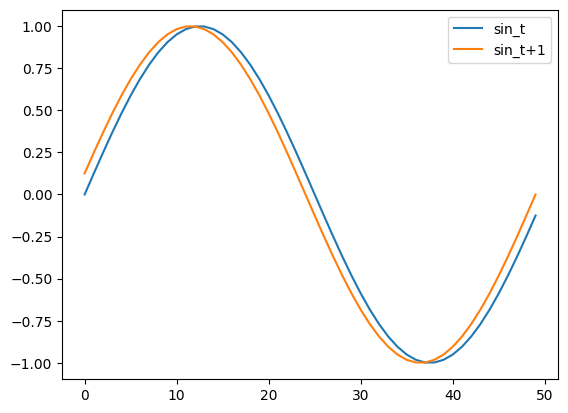

In [32]:
df[["sin_t", "sin_t+1"]].head(steps_per_cycle).plot()

In [41]:
df.info()
array = df[["sin_t", "sin_t+1"]].to_numpy()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   t        5000 non-null   int64  
 1   sin_t    5000 non-null   float64
 2   sin_t+1  5000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 156.2 KB


In [42]:
print(array)

[[ 0.00000000e+00  1.25333234e-01]
 [ 1.25333234e-01  2.48689887e-01]
 [ 2.48689887e-01  3.68124553e-01]
 ...
 [-3.68124553e-01 -2.48689887e-01]
 [-2.48689887e-01 -1.25333234e-01]
 [-1.25333234e-01  3.92877345e-15]]


In [43]:
np.save("normal.npy", array)